# Tests for Portfolio VaR Functions

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.express as px
import yfinance as yf

# Import functions
import PortfolioVaR as pv
import InteractivePlots
import ExpectedShortfall as ES

### Asset Normal/ Undiversified VaR

**NOTE**: since we already have the parametric VaR, a Portfolio-Normal VaR function is redundant. Portfolio-Normal is exactly like parametric VaR (which we have), and that can be backtested and ES can be done (add note about that).

**NOTE 2**: those are not meant to be backtested or to use ES with (double check).

In [2]:
# Set parameters
confidence_level = 0.99
holding_period = 1

In [3]:
# Step 1: Download prices
tickers = ["^GSPC", "^STOXX50E", "^N225", "DJI", "EEM"]
data = yf.download(tickers, start="2020-01-01", end="2020-03-01")["Close"]
data = data.dropna()

# Step 2: Define fixed quantities
quantities = pd.Series([10, 20, 30, 10, 90], index=tickers)

# Step 3: Compute monetary positions
position_data = data.multiply(quantities, axis=1)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


In [4]:
position_data.head()

,DJI,EEM,^GSPC,^N225,^STOXX50E
Date,,,,,
2020-01-06,287034.003906,3617.434959,32462.800293,696145.781250,75050.400391
2020-01-07,285836.992188,3615.014191,32371.799316,707271.621094,75185.000000
2020-01-08,287450.996094,3635.998077,32530.500488,696142.792969,75451.201172
2020-01-09,289569.003906,3660.211945,32746.999512,712196.074219,75917.597656
2020-01-10,288238.007812,3679.581528,32653.500977,715517.109375,75790.400391


In [5]:
# Compute and display the summary
summary_df = pv.var_asset_normal(position_data, display_table=True)

,Diversified_VaR,Undiversified_VaR,Diversification_Benefit
Date,,,
2020-01-07,33281.63,37417.77,4136.15
2020-01-08,33002.40,37130.73,4128.33
2020-01-09,33575.20,37755.22,4180.02
2020-01-10,33631.84,37807.60,4175.76
2020-01-14,33821.72,38016.58,4194.87
2020-01-15,33745.55,37940.22,4194.67
2020-01-16,33849.69,38067.69,4218.01
2020-01-17,33989.38,38222.04,4232.66
2020-01-21,33766.33,37973.83,4207.49


In [6]:
# One-row static input
static_position = pd.DataFrame([[1_000_000, 2_000_000, 3_000_000]])

var = pv.var_asset_normal(static_position, confidence_level=0.99)
# -> Warning will be shown, and function returns None

/Users/aledo/Documents/GitHub/VaR/Functions/PortfolioVaR.py:75: UserWarning:

You must provide a time series of positions (at least 2 rows).



### Marginal VaR

In [7]:
# Compute and display Marginal VaR (styled table)
marginal_df = pv.marginal_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
    display_table=True  # Enables styled notebook output
)


,DJI,EEM,^GSPC,^N225,^STOXX50E
Date,,,,,
2020-01-07,0.03,0.02,0.03,0.03,0.03
2020-01-08,0.03,0.02,0.03,0.03,0.03
2020-01-09,0.03,0.02,0.03,0.03,0.03
2020-01-10,0.03,0.02,0.03,0.03,0.03
2020-01-14,0.03,0.02,0.03,0.03,0.03
2020-01-15,0.03,0.02,0.03,0.03,0.03
2020-01-16,0.03,0.02,0.03,0.03,0.03
2020-01-17,0.03,0.02,0.03,0.03,0.03
2020-01-21,0.03,0.02,0.03,0.03,0.03


### Incremental, Component and Relative Component VaR

In [8]:
# Compute and display Component VaR (styled table)
component_df = pv.component_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
    display_table=True  # Enables styled notebook output
)

,DJI,EEM,^GSPC,^N225,^STOXX50E
Date,,,,,
2020-01-07,8291.03,89.27,874.62,21599.47,2427.25
2020-01-08,8369.00,90.05,882.40,21220.30,2440.65
2020-01-09,8407.51,90.45,885.68,21739.48,2452.08
2020-01-10,8356.00,90.82,881.70,21857.27,2446.05
2020-01-14,8383.76,91.66,885.85,22025.01,2435.43
2020-01-15,8420.34,91.03,888.68,21912.44,2433.06
2020-01-16,8509.25,91.70,897.39,21913.45,2437.89
2020-01-17,8521.19,92.20,900.55,22015.70,2459.75
2020-01-21,8480.46,89.89,898.55,21849.53,2447.90


In [9]:
rcvar_df = pv.relative_component_var(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
    display_table=True
)


,DJI,EEM,^GSPC,^N225,^STOXX50E
Date,,,,,
2020-01-07,24.91%,0.27%,2.63%,64.90%,7.29%
2020-01-08,25.36%,0.27%,2.67%,64.30%,7.40%
2020-01-09,25.04%,0.27%,2.64%,64.75%,7.30%
2020-01-10,24.85%,0.27%,2.62%,64.99%,7.27%
2020-01-14,24.79%,0.27%,2.62%,65.12%,7.20%
2020-01-15,24.95%,0.27%,2.63%,64.93%,7.21%
2020-01-16,25.14%,0.27%,2.65%,64.74%,7.20%
2020-01-17,25.07%,0.27%,2.65%,64.77%,7.24%
2020-01-21,25.12%,0.27%,2.66%,64.71%,7.25%


In [10]:
# Define change in position
change_vector = [0, 10000, 0, 0, 0]  # Increase Asset_B by 100 units

# Compute and display Incremental VaR
ivar_series = pv.incremental_var(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=0.99,
    holding_period=1,
    display_table=True
)

,Incremental_VaR
Date,
2020-01-07,246.93
2020-01-08,247.66
2020-01-09,247.12
2020-01-10,246.83
2020-01-14,246.68
2020-01-15,246.90
2020-01-16,247.15
2020-01-17,247.10
2020-01-21,247.17


# ES Test

In [38]:
# Compute and display Marginal VaR (styled table)
marginal_es_df = ES.marginal_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
    distribution="normal",
    display_table=True  # Enables styled notebook output
)


,DJI,EEM,^GSPC,^N225,^STOXX50E
Date,,,,,
2020-01-07,0.03,0.03,0.03,0.03,0.04
2020-01-08,0.03,0.03,0.03,0.03,0.04
2020-01-09,0.03,0.03,0.03,0.03,0.04
2020-01-10,0.03,0.03,0.03,0.03,0.04
2020-01-14,0.03,0.03,0.03,0.04,0.04
2020-01-15,0.03,0.03,0.03,0.03,0.04
2020-01-16,0.03,0.03,0.03,0.03,0.04
2020-01-17,0.03,0.03,0.03,0.03,0.04
2020-01-21,0.03,0.03,0.03,0.03,0.04


In [28]:
# Compute and display Component VaR (styled table)
component_es_df = ES.component_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
    distribution="t",
    display_table=True  # Enables styled notebook output
)

,DJI,EEM,^GSPC,^N225,^STOXX50E
Date,,,,,
2020-01-07,33310.53,358.64,3513.91,86779.27,9751.85
2020-01-08,33623.76,361.79,3545.18,85255.90,9805.70
2020-01-09,33778.49,363.40,3558.34,87341.81,9851.63
2020-01-10,33571.53,364.89,3542.38,87815.05,9827.39
2020-01-14,33683.08,368.27,3559.06,88488.97,9784.71
2020-01-15,33830.05,365.73,3570.40,88036.71,9775.20
2020-01-16,34187.27,368.42,3605.39,88040.75,9794.63
2020-01-17,34235.24,370.43,3618.08,88451.54,9882.43
2020-01-21,34071.60,361.15,3610.05,87783.95,9834.83


In [35]:
res_df = ES.relative_component_es(
    position_data=position_data,
    confidence_level=0.99,
    holding_period=1,
    distribution="normal",
    display_table=True
)


,DJI,EEM,^GSPC,^N225,^STOXX50E
Date,,,,,
2020-01-07,24.91%,0.27%,2.63%,64.90%,7.29%
2020-01-08,25.36%,0.27%,2.67%,64.30%,7.40%
2020-01-09,25.04%,0.27%,2.64%,64.75%,7.30%
2020-01-10,24.85%,0.27%,2.62%,64.99%,7.27%
2020-01-14,24.79%,0.27%,2.62%,65.12%,7.20%
2020-01-15,24.95%,0.27%,2.63%,64.93%,7.21%
2020-01-16,25.14%,0.27%,2.65%,64.74%,7.20%
2020-01-17,25.07%,0.27%,2.65%,64.77%,7.24%
2020-01-21,25.12%,0.27%,2.66%,64.71%,7.25%


In [36]:
# Define change in position
change_vector = [0, 10000, 0, 0, 0]  # Increase Asset_B by 100 units

# Compute and display Incremental VaR
ies_series = ES.incremental_es(
    position_data=position_data,
    change_vector=change_vector,
    confidence_level=0.99,
    holding_period=1,
    distribution="normal",
    display_table=True
)

,Incremental_ES
Date,
2020-01-07,282.90
2020-01-08,283.74
2020-01-09,283.12
2020-01-10,282.78
2020-01-14,282.61
2020-01-15,282.87
2020-01-16,283.15
2020-01-17,283.10
2020-01-21,283.18


### Visualizations

Here add linea tratteggiata like in the other plots to visualize interactively

In [11]:
InteractivePlots.interactive_plot_var_series(summary_df)

In [12]:
InteractivePlots.interactive_plot_risk_contribution_bar(component_df)

In [13]:
InteractivePlots.interactive_plot_risk_contribution_lines(component_df)

In [14]:
InteractivePlots.interactive_plot_correlation_matrix(position_data)

### Try Caller (with static plots)


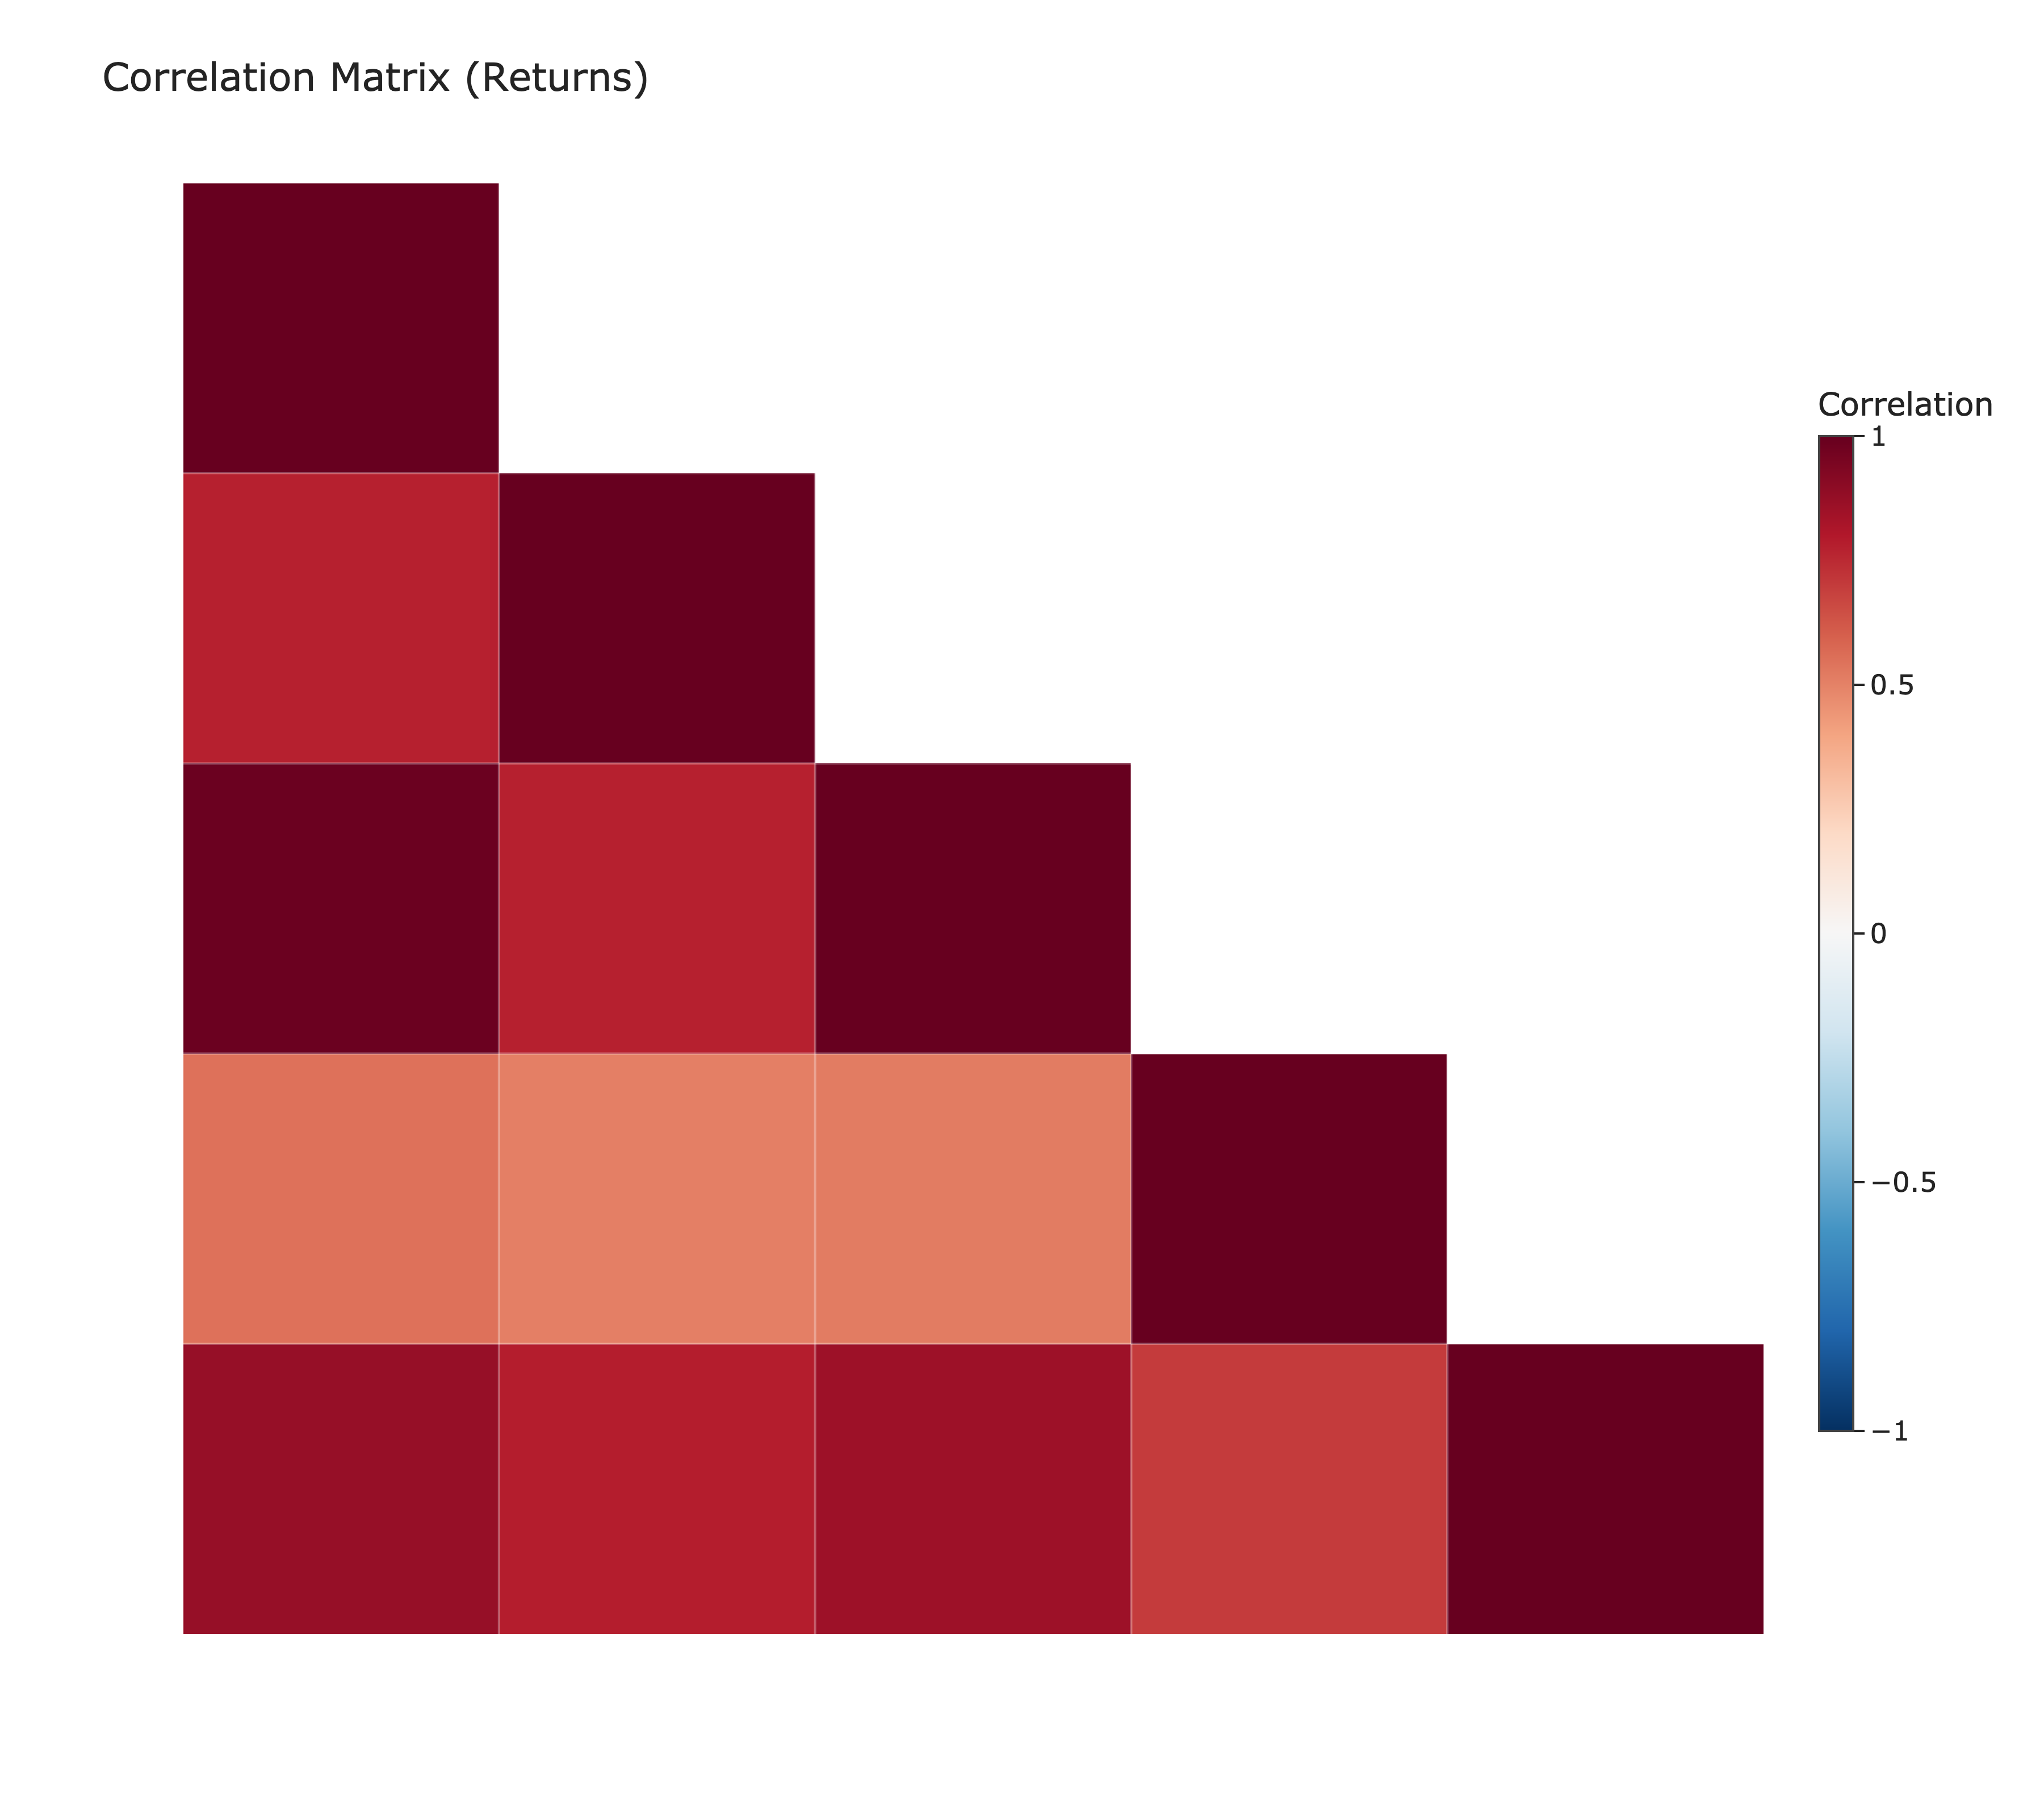

In [15]:
InteractivePlots.plot_caller(
    plot_type="correlation_matrix",
    interactive=False,
    position_data=position_data,
)



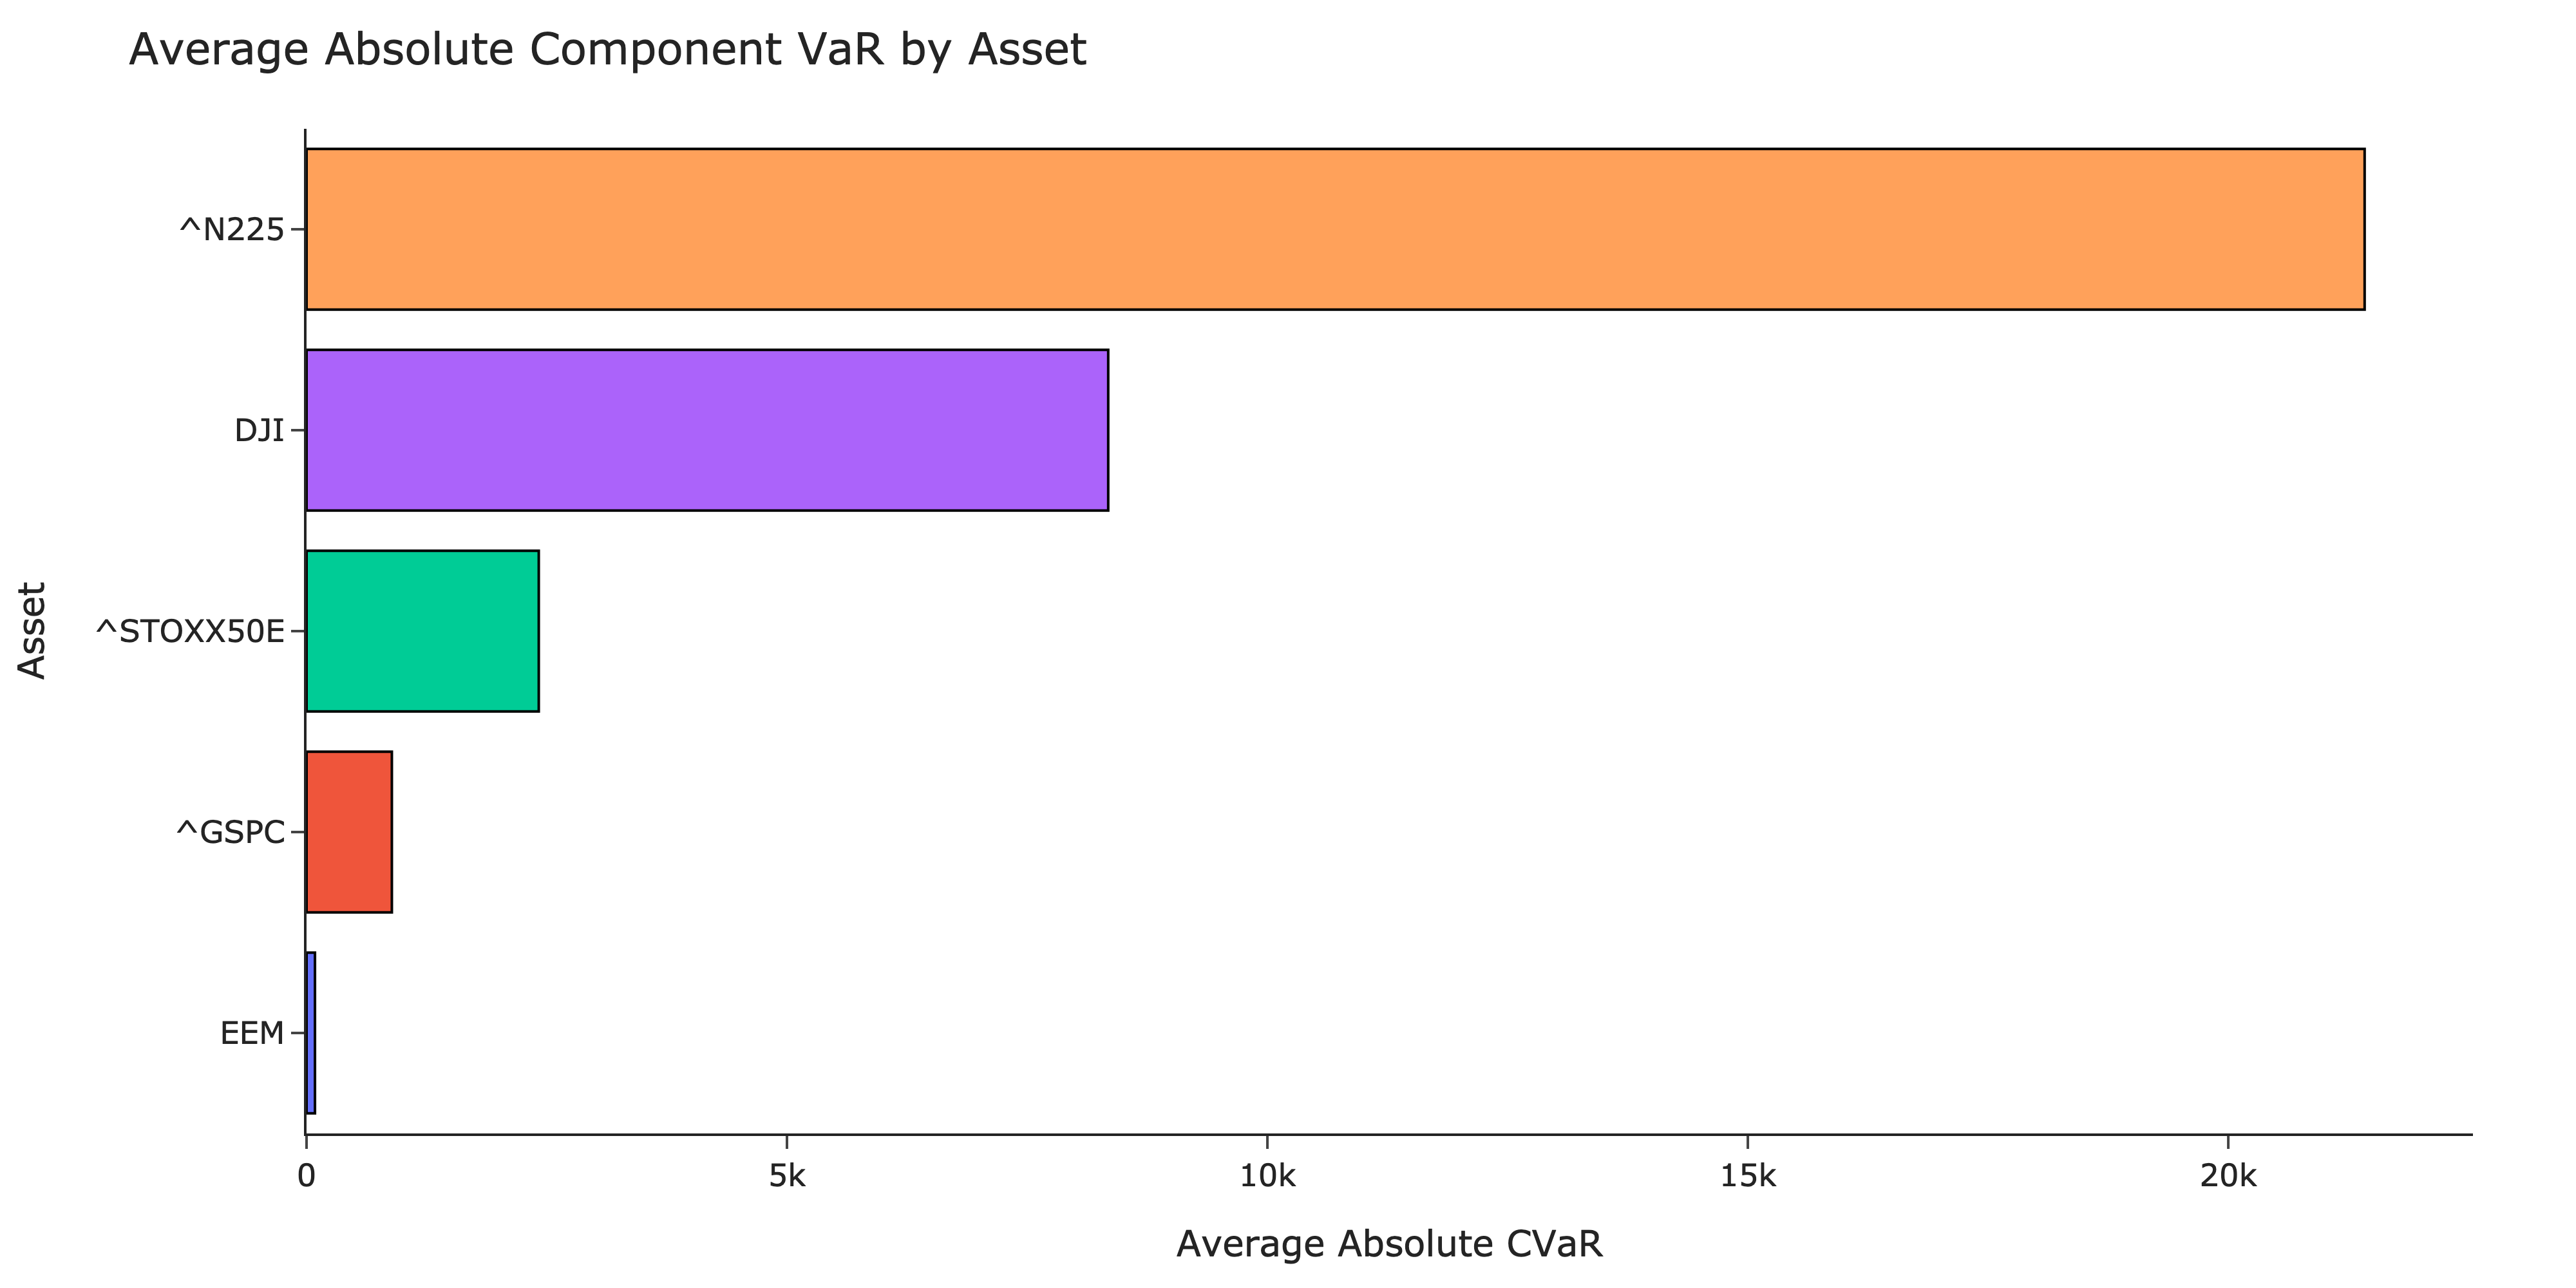

In [16]:
InteractivePlots.plot_caller(
    plot_type="component_var_bar",
    interactive=False,
    component_df=component_df
)


---
### Appendix

- **Asset-Normal VaR (AN VaR)**  
  $$
  \text{VaR}_t = z_\alpha \cdot \sqrt{x_t^\top \Sigma x_t} \cdot \sqrt{h}
  $$

- **Undiversified VaR (UVaR)**  
  $$
  \text{UVaR}_t = z_\alpha \cdot \sum_{i=1}^N \sigma_i x_{i,t} \cdot \sqrt{h}
  $$

- **Marginal VaR**  
  $$
  \Delta \text{VaR}_{i,t} = \text{VaR}_t \cdot \frac{(\Sigma x_t)_i}{x_t^\top \Sigma x_t}
  $$

- **Component VaR**  
  $$
  \text{CVaR}_{i,t} = x_{i,t} \cdot \Delta \text{VaR}_{i,t}
  $$

- **Relative Component VaR**  
  $$
  \text{RCVaR}_{i,t} = \frac{\text{CVaR}_{i,t}}{\text{VaR}_t}
  $$

- **Incremental VaR**  
  $$
  \text{IVaR}_t = \Delta \text{VaR}_t^\top \cdot a
  $$

---

### Function Dependencies

```text
var_asset_normal()
 └── marginal_var()
      ├── component_var()
      │     └── relative_component_var()
      └── incremental_var()
```

---

### Notes
- All risk measures are in **monetary terms**.
- Covariance is based on returns inferred from time series of holdings.
- Inputs: matrix of monetary holdings, confidence level $z_\alpha$, and horizon $h$.